c:\users\dell-admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\dell-admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\dell-admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged

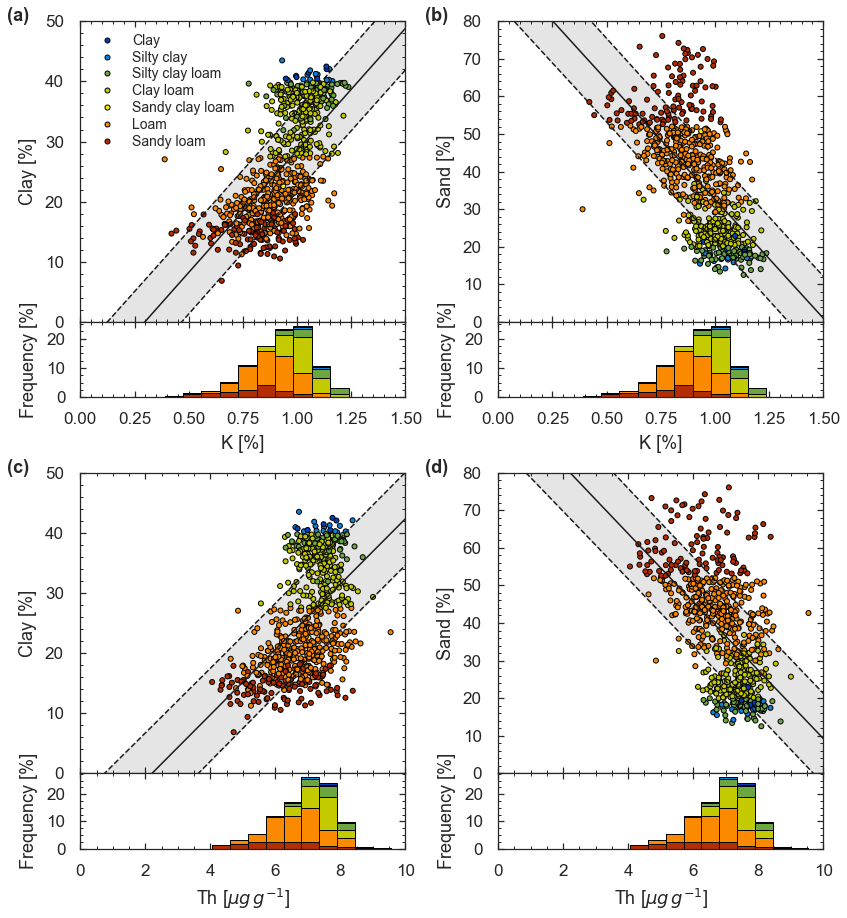

In [6]:
import scipy.optimize as optimization
from scipy.optimize import curve_fit
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from matplotlib.ticker import PercentFormatter

data = pd.read_excel("Correlazioni_Tommy_IA.xlsx","Dati", header=[0], engine="openpyxl")

x=np.linspace(0,12,1000)

fig,ax=plt.subplots(2,2,figsize=(12,13))

Class = data['Classe tessiturale']
Colors = ['#003EC2', '#0A81DC', '#6CA641', '#C3CA00', '#FFED00', '#FB8A00', '#B32D01']

Clay = data.loc[data['Classe tessiturale']=='Clay']
Silty_clay = data.loc[data['Classe tessiturale']=='Silty clay']
Silty_clay_loam = data.loc[data['Classe tessiturale']==' Silty clay loam']
Clay_loam = data.loc[data['Classe tessiturale']=='Clay loam']
Sandy_clay_loam = data.loc[data['Classe tessiturale']=='Sandy clay loam']
Loam = data.loc[data['Classe tessiturale']=='Loam']
Sandy_loam = data.loc[data['Classe tessiturale']=='Sandy loam']

K_class = []
K_class.append(Clay['K [%]'])
K_class.append(Silty_clay['K [%]'])
K_class.append(Silty_clay_loam['K [%]'])
K_class.append(Clay_loam['K [%]'])
K_class.append(Sandy_clay_loam['K [%]'])
K_class.append(Loam['K [%]'])
K_class.append(Sandy_loam['K [%]'])

Th_class = []
Th_class.append(Clay['Th [ppm]'])
Th_class.append(Silty_clay['Th [ppm]'])
Th_class.append(Silty_clay_loam['Th [ppm]'])
Th_class.append(Clay_loam['Th [ppm]'])
Th_class.append(Sandy_clay_loam['Th [ppm]'])
Th_class.append(Loam['Th [ppm]'])
Th_class.append(Sandy_loam['Th [ppm]'])

K_class_rev = K_class[::-1]
Th_class_rev = Th_class[::-1]
Colors_rev = Colors[::-1]

Classcolors = []

for num in range(len(Class)):
    if Class[num] == 'Clay':
        Classcolors.append(Colors[0])
    elif Class[num] == 'Silty clay':
        Classcolors.append(Colors[1])
    elif Class[num] == ' Silty clay loam':
        Classcolors.append(Colors[2])
    elif Class[num] == 'Clay loam':
        Classcolors.append(Colors[3])
    elif Class[num] == 'Sandy clay loam':
        Classcolors.append(Colors[4])
    elif Class[num] == 'Loam':
        Classcolors.append(Colors[5])
    elif Class[num] == 'Sandy loam':
        Classcolors.append(Colors[6])
    else:
        Classcolors.append('black')
        
        
gs = gridspec.GridSpec(11, 4, hspace=0.0)

ax1 = plt.subplot(gs[:4, :2])
ax2 = plt.subplot(gs[:4, 2:4])
ax3 = plt.subplot(gs[6:10, :2])
ax4 = plt.subplot(gs[6:10, 2:4])

h1 = plt.subplot(gs[4:5, :2])
h2 = plt.subplot(gs[4:5, 2:4])
h3 = plt.subplot(gs[10:11, :2])
h4 = plt.subplot(gs[10:11, 2:4])


def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = sp.stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

histons = []

for ax, h, element, tess, dataelement, datatess, ele_class, m, sm, q, sq, r, unit, xpos, ypos, xlim, ylim, lett, xdelta, ydelta in zip([ax1, ax2, ax3, ax4],
                                                                                                                                       [h1, h2, h3, h4],
                                                                                                                                       ['K', 'K', 'Th', 'Th'],
                                                                                                                                       ['Clay', 'Sand', 'Clay', 'Sand'],
                                                                                                                                       [data['K [%]'], data['K [%]'], data['Th [ppm]'], data['Th [ppm]']],
                                                                                                                                       [data['Argilla [%]'], data['Sabbia [%]'], data['Argilla [%]'], data['Sabbia [%]']],
                                                                                                                                       [K_class_rev, K_class_rev, Th_class_rev, Th_class_rev],
                                                                                                                                       [40.5710616958128, -63.2696401104491, 5.42674696009352, -9.07373049106144],
                                                                                                                                       [1.78336595582234, 2.87412049648516, 0.329192106118262, 0.512887367632432],
                                                                                                                                       [-12.0411376728981, 95.9543410664026, -11.9449083277568, 100.024271545341],
                                                                                                                                       [1.67192004096413, 2.69451126535804, 2.29213757671369, 3.57119258366946],
                                                                                                                                       [0.646426625158702, -0.634000061854933, 0.523201207745493, -0.550181666992621],
                                                                                                                                       ['%', '%', r'$\mu g\,g^{-1}$', r'$\mu g\,g^{-1}$'],
                                                                                                                                       [0.58, 0.1, 3.90, 0.8],
                                                                                                                                       [4, 7, 4, 7],
                                                                                                                                       [1.5, 1.5, 10, 10],
                                                                                                                                       [50, 80, 50, 80],
                                                                                                                                       ['(a)', '(b)', '(c)', '(d)'],
                                                                                                                                       [0.07, 0.07, 0.5, 0.5],
                                                                                                                                       [20, 32, 20, 32]):
    ######################################################################
    def line(x, slope, intercept):
        """a line"""
        return slope*x + intercept
    
    popt, pcov = curve_fit(line, dataelement, datatess)
    a = popt[0]
    b = popt[1]
    a,b = unc.correlated_values(popt, pcov)
    
    px = np.linspace(0,12,1000)
    py = a*px+b
    nom = unp.nominal_values(py)
    std = unp.std_devs(py)
    
    lpb, upb = predband(px, dataelement, datatess, popt, line, conf=0.68)
    
    ax.plot(px, lpb, 'k--', label='68% Prediction Band')
    ax.plot(px, upb, 'k--')
    ax.fill_between(px, lpb, upb, color="#ABABAB", alpha=0.3, label='68% prediction band', zorder=-1)
    
    ####################################################################################
    
    ax.scatter(dataelement, datatess, c=Classcolors, edgecolor='black', label='Data', s=25)
    
    ax.plot(x, (m*x)+q, 'k-')

    ax.axes.xaxis.set_ticklabels([])
    ax.set_ylabel(f'{tess} [%]', labelpad=8)
    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    
    t3 = ax.text(s=lett,x=-(4.5*xlim)/20,y=ylim,size=18, weight='bold')

    ax.tick_params(axis='y',which='minor',direction='in',length=3)
    ax.tick_params(axis='x',which='minor',direction='in',length=3)
    ax.tick_params(axis='y',which='major',direction='in',length=6,pad=16.5)
    ax.tick_params(axis='x',which='major',direction='in',length=6,pad=15)
    
    custom_lines = [Line2D([0], [0], markerfacecolor=Colors[0], color='black', marker='o', markersize=5, lw=0),
                    Line2D([0], [0], markerfacecolor=Colors[1], color='black', marker='o', markersize=5, lw=0),
                    Line2D([0], [0], markerfacecolor=Colors[2], color='black', marker='o', markersize=5, lw=0),
                    Line2D([0], [0], markerfacecolor=Colors[3], color='black', marker='o', markersize=5, lw=0),
                    Line2D([0], [0], markerfacecolor=Colors[4], color='black', marker='o', markersize=5, lw=0),
                    Line2D([0], [0], markerfacecolor=Colors[5], color='black', marker='o', markersize=5, lw=0),
                    Line2D([0], [0], markerfacecolor=Colors[6], color='black', marker='o', markersize=5, lw=0)]
                
    labels = ['Clay', 'Silty clay', 'Silty clay loam', 'Clay loam', 'Sandy clay loam', 'Loam', 'Sandy loam']

    
    hists=h.hist(ele_class, stacked=True, density=0, color=Colors_rev, edgecolor='black')

    h.set_yticks([0,72.3,144.6])
    h.set_yticklabels([0,10,20])
    h.set_xlim(0,xlim)
    h.set_xlabel(f'{element} [{unit}]', labelpad=8)
    h.set_ylabel('Frequency [%]', labelpad=8)
    h.tick_params(axis='y',which='minor',direction='in',length=3)
    h.tick_params(axis='x',which='minor',direction='in',length=3)
    h.tick_params(axis='y',which='major',direction='in',length=6,pad=15)
    h.tick_params(axis='x',which='major',direction='in',length=6,pad=15)

plt.rc('font', size=15)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=18)

ax1.legend(custom_lines, labels, loc='upper left', fontsize=14, frameon=False, labelspacing=0.2)

fig.tight_layout()
fig.savefig(f"Figure_paper_DEF/Figure_3.svg",dpi=300,format='svg')